# [통신사 고객 이탈 데이터 EDA]



<img src='https://github.com/h33sun/Lets-EDA/blob/master/%ED%86%B5%EC%8B%A03%EC%82%AC.png?raw=true'>

- 어떻게 이탈 고객을 탐지할 수 있을까?

## 1. Imprort data

In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [2]:
churn = pd.read_csv('C:/Users/HSS/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Description 
- `customerID`:  고객 ID
- `gender`:  고객 성별
- `SeniorCitizen`:  65세 이상 여부 (yes, no)
- `Partner`:  배우자 여부 (Yes, No) 
- `Dependents`: 자녀 여부 (Yes, No) 
- `tenure`: 가입 기간 
- `PhoneService`: 핸드폰 서비스 사용 여부 (Yes, No) 핸드폰 서비스 사용 여부
- `MultipleLines`: 다수의 Line 이용 여부 (Yes, No, No phone service)
- `InternetService`: 인터넷 서비스 종류 (DSL, Fiber, optic, No)
- `OnlineSecurity`: 온라인보안서비스가입여부 (Yes, No, No internet service)
- `OnlineBackup`: 온라인백업서비스가입여부 (Yes, No, No internet service) ()
- `DeviceProtection`: 기기보호가입여부 (Yes, No, No internet service) ()
- `TechSupport`: 기술지원가입여부 (Yes, No, No internet service)
- `StreamingTV`: TV스트리밍가입여부 (Yes, No, No internet service)
- `StreamingMovie`: 영화스트리밍가입여부 (Yes, No, No internet service)
- `Contract`: 계약방식 (Month-to-month, One year, Two year)
- `PaperlessBilling`: 전자명세표가입여부 (Yes, No)
- `PaymentMethod`: 요금지불방식 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: 가입기간내평균월요금
- `TotalCharges`: 가입기간내총요금
- `Churn`: 이탈여부 (Yes or No)

## 3. 데이터 전처리
- `Partener`, `Dependents` 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- `MultipleLines`  
- `Churn`과 `Customer` 세트 분리하기
- Nan 처리
    - `TotalCharges` 칼럼에 11개 Nan 존재
    - 모두 `Tenure`: 0, `TotalCharges` : Nan, `MonthlyCharges`가 존재했기 때문에 11개의 Nan 값을 `MohtnlyCharges`로 대체


In [5]:
# Yes, NO ONE HOT 
data = churn.copy()
columns = data.columns.values
y_n_columns = columns[[3,4,6,9,10,11,12,13,14,16,20]]
y_n_columns

for i in y_n_columns:
    data[i] = data[i].apply(lambda x: 0 if x == 'No' else 1)

data['gender'] = data['gender'].apply(lambda x: 0 if x == 'Male' else 1)
data['Contract'] = data['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1)
data['PaymentMethod'] = data['PaymentMethod'].apply(lambda x: 0 if x in ['Electronic check',' Mailed check'] else 1)
data['MultipleLines'] = data['MultipleLines'].apply(lambda x: 0 if x == 'No phone service' else 1 if x == 'No' else 2)
data['InternetService'] = data['InternetService'].apply(lambda x:1 if  x == 'DSL' else 2 if x == 'Fiber optic' else 0)


data.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,1,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,1,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,2,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,2,2,0,1,0,0,1,0,0,1,1,89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.9,0
8,7892-POOKP,1,0,1,0,28,1,2,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,1,1,1,1,0,0,0,0,1,0,1,56.15,3487.95,0


In [6]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')
print(sum(np.isnan(data['TotalCharges'])))
data.info()

11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memo

In [8]:
idx = np.isnan(data['TotalCharges'])
data['TotalCharges'][idx] = data['MonthlyCharges'][idx]

In [9]:
# Nan 제거 완료
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

### 데이터 상관계수

- `Churn` 과 `tenure`가 가장 밀접한 선형 관계를 갖고 있다.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` 가 같은 방향으로 움직인다. 

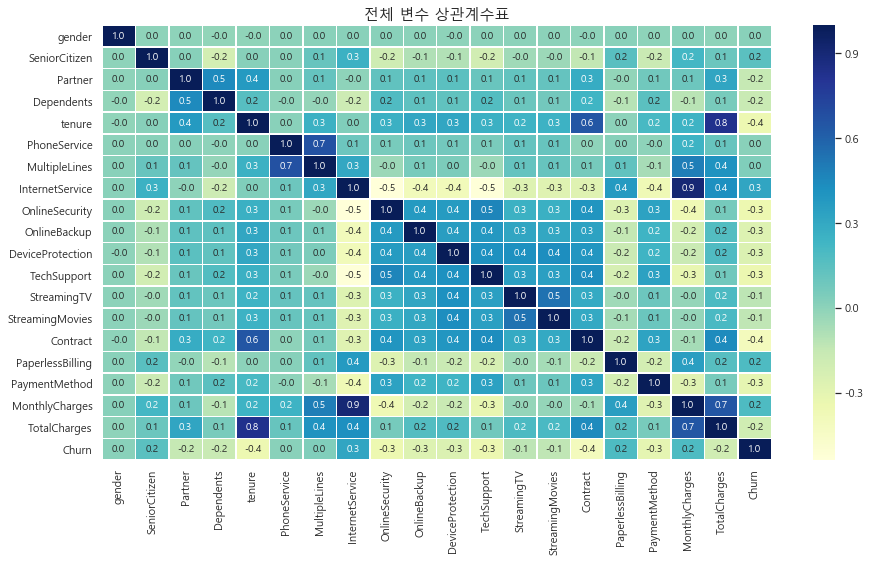

In [10]:
plt.figure(figsize = (15,8))
plt.title('전체 변수 상관계수표', fontsize = 15)
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
# RdYlGn_r, YlGnBu
plt.show()

###  [3-1] 병합

- 높은 상관관계를 갖고 보장 성격을 갖는 변수들(`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `Tech support`)를 `Insurance`로 병합

- `StreamingTV`와 `StreamingMovies`를 `Streaming`으로 병합

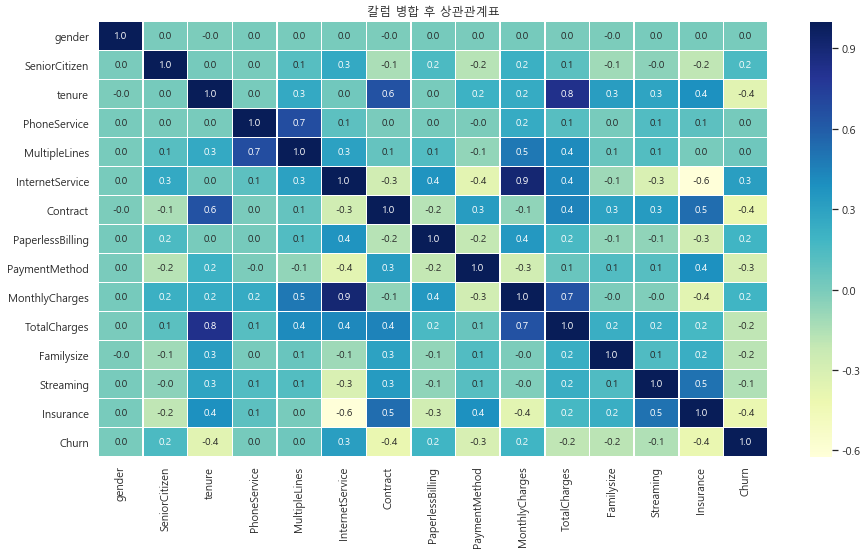

In [11]:
data['Insurance'] = data[['OnlineBackup', 'OnlineSecurity','DeviceProtection','TechSupport']].sum(axis = 1)
data['Streaming'] = data[['StreamingMovies', 'StreamingTV']].sum(axis = 1)
data['Familysize'] = data[['Partner', 'Dependents']].sum(axis = 1)+1


insurance = ['OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport']
streaming = ['StreamingMovies','StreamingTV']
family = ['Partner', 'Dependents' ]

[data.drop(x,axis=1, inplace = True) for x in insurance]
[data.drop(x,axis=1, inplace = True) for x in streaming]
[data.drop(x,axis=1, inplace = True) for x in family]

cols = list(data.columns)
cols[-4:] = cols[-4:][::-1]

data = data[cols]
data.head()

plt.figure(figsize = (15,8))
plt.title('칼럼 병합 후 상관관계표')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

In [12]:
clean_data = data.copy()
churns = clean_data[clean_data['Churn'] == 1]
customers = clean_data[clean_data['Churn'] == 0]

## - Quick Summary
### Demographic info
   - `Sex`
   - `SeniorCitizen`
   - `Familysize`


In [13]:
print('\n[전체 가입자]: {}명 / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%)'
     .format(len(clean_data), 
             len(clean_data[clean_data['gender']==0]),
             round(len(clean_data[clean_data['gender']==0]) / len(clean_data) * 100,2),
             len(clean_data[clean_data['gender']==1]),
             round(len(clean_data[clean_data['gender']==1]) / len(clean_data) * 100,2),
             len(clean_data[clean_data['SeniorCitizen']==1]),
             round(len(clean_data[clean_data['SeniorCitizen']==1])/len(clean_data) * 100, 2)
            
            ))

print('\n[전체 이탈고객]: {}명({}%) / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%)'
     .format(len(churns),
             round(len(churns)/len(clean_data)*100,2),
             len(churns[churns['gender']==0]),
             round(len(churns[churns['gender']==0]) / len(churns) * 100,2),
             len(churns[churns['gender']==1]),
             round(len(churns[churns['gender']==1]) / len(churns) * 100,2),
             len(churns[churns['SeniorCitizen']==1]),
             round(len(churns[churns['SeniorCitizen']==1])/len(churns) * 100, 2)
            
            
            ))

print('\n[전체 유지고객]: {}명({}%) / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%)'
     .format(len(customers),
             round(len(customers)/len(clean_data)*100,2),
             len(customers[customers['gender']==0]),
             round(len(customers[customers['gender']==0]) / len(customers) * 100,2),
             len(customers[customers['gender']==1]),
             round(len(customers[customers['gender']==1]) / len(customers) * 100,2),  
             len(customers[customers['SeniorCitizen']==1]),
             round(len(customers[customers['SeniorCitizen']==1])/len(customers) * 100, 2)
            ))


            


[전체 가입자]: 7043명 / [남성]: 3555명(50.48%), [여성]: 3488명(49.52%) / [65세이상]: 1142명(16.21%)

[전체 이탈고객]: 1869명(26.54%) / [남성]: 930명(49.76%), [여성]: 939명(50.24%) / [65세이상]: 476명(25.47%)

[전체 유지고객]: 5174명(73.46%) / [남성]: 2625명(50.73%), [여성]: 2549명(49.27%) / [65세이상]: 666명(12.87%)


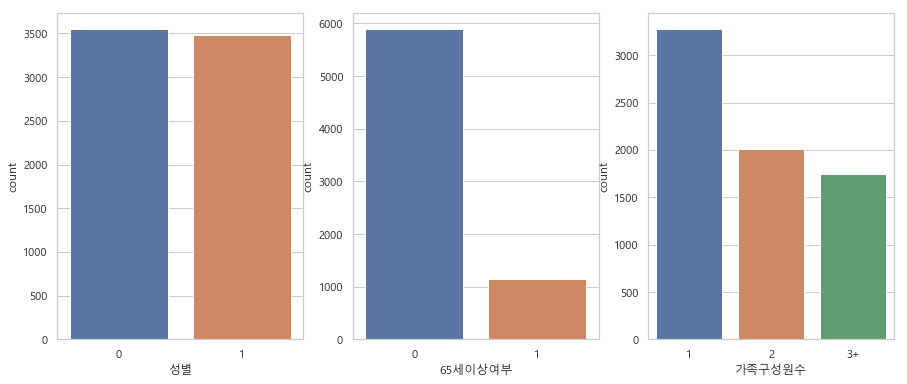

In [49]:
plt.figure(figsize = (15,6))
plt.subplot(131)
sns.countplot(clean_data['gender'])
plt.xlabel('성별')
plt.subplot(132)
sns.countplot(clean_data['SeniorCitizen'])
plt.xlabel('65세이상여부')
plt.subplot(133)
clean_data['Familysize'].loc[clean_data['Familysize'] >= 3] = '3+'
sns.countplot(clean_data['Familysize'].astype('str').sort_values())
plt.xlabel('가족구성원수')
plt.show()


In [15]:
#가구별이탈
family_churn = clean_data.groupby(['Churn','Familysize']).count()['customerID'].reset_index()
family_churn = family_churn.pivot('Familysize', 'Churn','customerID')
family_churn

Churn,0,1
Familysize,,
1,2157,1123
2,1517,497
3+,1500,249


## 4. 가설 검증
### [4-1] Tenure (가입기간)

<img src ='https://github.com/h33sun/Lets-EDA/blob/master/calendar.PNG?raw=true' width = '50%'>

#  
- `전체 고객`의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- `이탈 고객`의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- `유지 고객`의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포




###  `이탈 고객의 특징`: Tenure(계약기간)가 상대적으로 짧다.

In [16]:
clean_data = data.copy()
print(' \n [전체 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(clean_data['tenure'].mean()), int(clean_data['tenure'].quantile(0.75)), clean_data['tenure'].min(), clean_data['tenure'].max()))

print(' \n [이탈 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(churns['tenure'].mean()), int(churns['tenure'].quantile(0.75)), churns['tenure'].min(), churns['tenure'].max()))

print(' \n [유지 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(customers['tenure'].mean()), int(customers['tenure'].quantile(0.75)), customers['tenure'].min(), customers['tenure'].max()))

 
 [전체 고객]의 평균 계약 기간은 32개월이고, 75%의 사람들은 55개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [이탈 고객]의 평균 계약 기간은 17개월이고, 75%의 사람들은 29개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 1개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [유지 고객]의 평균 계약 기간은 37개월이고, 75%의 사람들은 61개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 





#  


### [4-1.1] 가설1 : 계약 기간이 짧을 수록 이탈 가능성이 높을 것이다.

#### - 이탈 고객의 41%가 계약 6개월 이내 계약을 종료했다.
#### - 고객의 이탈을 효과적으로 예방하려면 가입 6개월 이내에 조취를 취하는 것이 중요!


In [17]:
print('이탈 고객 {}명 중 {}명({}%)가 계약 12개월 이내 서비스를 해지했다. (6개월 이전 이탈 {}명({}%))' 
      .format(
      len(churns),
      len(churns[churns['tenure']<=12]), 
      round(len(churns[churns['tenure']<=12])/len(churns)*100,1),
      len(churns[churns['tenure']<=6]),
      round(len(churns[churns['tenure']<=6])/len(churns)*100,1)
     ))
     

이탈 고객 1869명 중 1037명(55.5%)가 계약 12개월 이내 서비스를 해지했다. (6개월 이전 이탈 784명(41.9%))


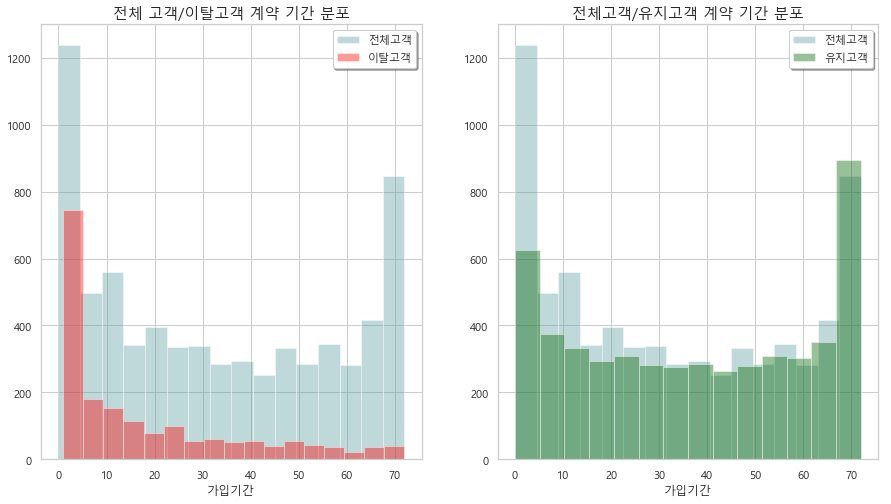

In [48]:
plt.figure(figsize = (15,8))
plt.subplot(121)

plt.title('전체 고객/이탈고객 계약 기간 분포', fontsize = 15)
sns.distplot(clean_data['tenure'], color = 'cadetblue', kde = False)
sns.distplot(churns['tenure'], color = 'red', kde = False)
plt.legend(['전체고객', '이탈고객'], shadow = True)
plt.xlabel('가입기간')
# sns.distplot(customers['tenure'], color = 'orange', kde = False)

plt.subplot(122)
plt.title('전체고객/유지고객 계약 기간 분포', fontsize = 15)
sns.distplot(clean_data['tenure'], color = 'cadetblue', kde = False)
# sns.distplot(churns['tenure'], color = 'orange', kde = False)
sns.distplot(customers['tenure'], color = 'darkgreen', kde = False)
plt.xlabel('가입기간')
plt.legend(['전체고객', '유지고객'], shadow = True)


plt.show()

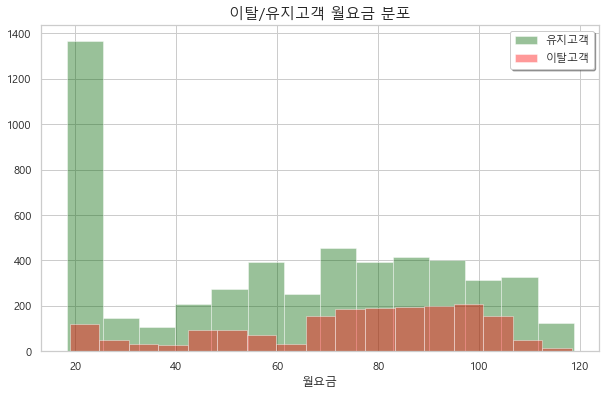

In [47]:
# sns.distplot(churns['TotalCharges'], kde = False)
plt.figure(figsize = (10,6))


plt.title('이탈/유지고객 월요금 분포', fontsize = 15)
sns.distplot(customers['MonthlyCharges'], color = 'darkgreen', kde = False)
sns.distplot(churns['MonthlyCharges'], color = 'red', kde = False)
plt.xlabel('월요금')
plt.legend(['유지고객', '이탈고객'], shadow = True)

plt.show()


###  [정보1] 40% 이상의 고객이 6개월 이전에 계약을 해지했다.

#### - 계약 기간을 그룹화해서 이탈 양상을 살펴보자

In [20]:
print('!이탈 고객 {}명 중 {}명({}%)가 계약 12개월 이내 서비스를 해지했다. **(6개월 이전 이탈 {}명({}%))' 
      .format(
      len(churns),
      len(churns[churns['tenure']<=12]), 
      round(len(churns[churns['tenure']<=12])/len(churns)*100,1),
      len(churns[churns['tenure']<=6]),
      round(len(churns[churns['tenure']<=6])/len(churns)*100,1)
     ))
     

!이탈 고객 1869명 중 1037명(55.5%)가 계약 12개월 이내 서비스를 해지했다. **(6개월 이전 이탈 784명(41.9%))


In [21]:
# clean_data = data.copy()

def tenure(clean_data):
    if clean_data['tenure'] <6 :
        return ' 0-6개월'
    elif (clean_data['tenure'] >= 6) and  (clean_data['tenure'] < 12):
        return ' 6-12개월'
    elif (clean_data['tenure'] >= 12) and  (clean_data['tenure'] < 24):
        return  '1-2년'
    elif (clean_data['tenure'] >= 24) and  (clean_data['tenure'] < 36):
        return  '2-3년'
    else:
        return  '3+년'
    



clean_data['tenure_group'] = clean_data.apply(lambda clean_data: tenure(clean_data), axis = 1)
clean_data.head()

    
churns = clean_data[clean_data['Churn'] == 1]
customers = clean_data[clean_data['Churn'] == 0]


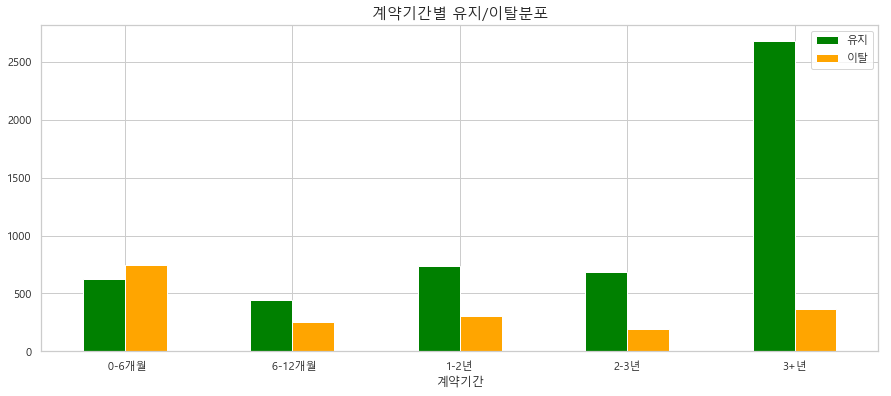

In [22]:
tenuregr_churn = clean_data.groupby(['tenure_group', 'Churn']).count()['customerID'].reset_index()
tenuregr_churn = tenuregr_churn.pivot('tenure_group','Churn','customerID')
tenuregr_churn.plot(kind = 'bar', rot = False, figsize = (15,6), color = ['green','orange'])
plt.xlabel('계약기간')
plt.title('계약기간별 유지/이탈분포', fontsize = 15)
plt.legend(['유지','이탈'])
plt.show()

### [정보2] 가입기간 6개월 미만의 사용자들과 3년 이상의 사용자들의 유지/이탈 양상이 타 기간과 다름
#### - 6개월 미만, 3년 이상 두 그룹은 어떤 특성을 가진 이용자인가?
##### - [조기해지고객이란?]: 가입 6개월 이내 계약을 해지한 이탈고객

####  조기해지고객과 동기간 계약유지고객의특성
- 연령,  가족규모 , 보장서비스, 월요금
- 이탈 6개월 이내, 유지 6개월 이내간 비교
- 초반 이탈 고객은 유지 고객보다 Insurance를 많이 들지 않았다.

In [23]:
churn_in_6 = churns[churns['tenure']<=6]
stay_in_6 = customers[customers['tenure'] <=6]

In [24]:
print('이탈 고객 {}명 중 {}명({}%)가 계약 12개월 이내 서비스를 해지했다. (6개월 이전 이탈 {}명({}%))' 
      .format(
      len(churns),
      len(churns[churns['tenure']<=12]), 
      round(len(churns[churns['tenure']<=12])/len(churns)*100,1),
      len(churns[churns['tenure']<=6]),
      round(len(churns[churns['tenure']<=6])/len(churns)*100,1)
     ))
     

이탈 고객 1869명 중 1037명(55.5%)가 계약 12개월 이내 서비스를 해지했다. (6개월 이전 이탈 784명(41.9%))


In [25]:
churn_in_6.describe() - stay_in_6.describe()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.00000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,0.043124,0.116882,-0.455875,-0.013886,0.107946,0.649368,-0.08672,0.257086,-0.265198,18.920101,25.767520,-0.102765,-0.337366,-1.198811,1.0
std,0.000390,0.122842,-0.158412,0.018491,0.109636,-0.101518,-0.21769,-0.037974,0.024620,-0.632402,17.977515,-0.091841,-0.101965,-0.449243,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.050000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,25.400000,21.900000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,-1.000000,25.550000,4.400000,0.000000,-1.000000,-2.000000,1.0
75%,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,11.500000,33.100000,0.000000,-1.000000,-3.000000,1.0
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.950000,101.650000,0.000000,0.000000,0.000000,1.0


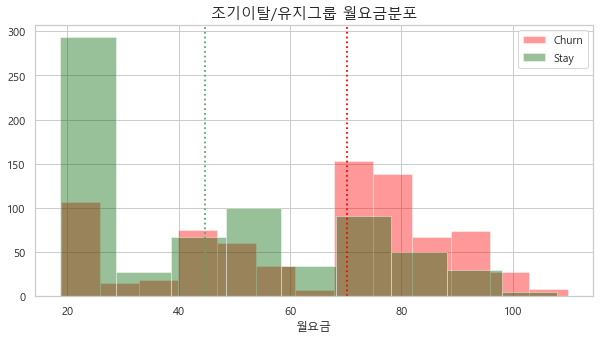

In [46]:
plt.figure(figsize = (10,5))
plt.title('조기이탈/유지그룹 월요금분포', fontsize = 15)
sns.distplot(churn_in_6['MonthlyCharges'], kde = False, color = 'red', label= 'Churn')
sns.distplot(stay_in_6['MonthlyCharges'], kde =False, color = 'darkgreen', label = 'Stay')

plt.legend()
plt.axvline(churn_in_6['MonthlyCharges'].median(), color = 'red', linewidth = 1.8 ,linestyle = ':')
plt.axvline(stay_in_6['MonthlyCharges'].median(), color = 'g', linewidth = 1.8 ,linestyle = ':')
plt.xlabel('월요금')
plt.show()

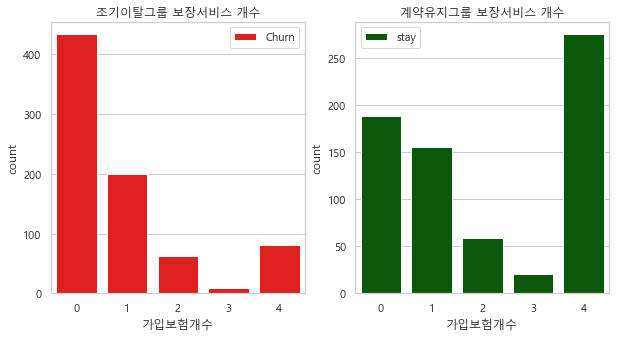

In [45]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.title('조기이탈그룹 보장서비스 개수')
sns.countplot(churn_in_6['Insurance'],color = 'red', label= 'Churn')
plt.xlabel('가입보험개수')
plt.legend()

plt.subplot(122)
plt.title('계약유지그룹 보장서비스 개수')
sns.countplot(stay_in_6['Insurance'],color = 'darkgreen', label= 'stay')
plt.xlabel('가입보험개수')
plt.legend()
plt.show()

In [28]:
print('\n[전체사용자]: {}명 / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%) \n [월요금중앙값]: {}, 보장서비스 {}개'
     .format(len(clean_data),             
             len(clean_data[clean_data['gender']==0]),
             round(len(clean_data[clean_data['gender']==0]) / len(clean_data) * 100,2),
             len(clean_data[clean_data['gender']==1]),
             round(len(clean_data[clean_data['gender']==1]) / len(clean_data) * 100,2),
             len(clean_data[clean_data['SeniorCitizen']==1]),
             round(len(clean_data[clean_data['SeniorCitizen']==1])/len(clean_data) * 100, 2),
             round(clean_data['MonthlyCharges'].median()),
             round(clean_data['Insurance'].mean())))


print('\n[조기 이탈고객]: {}명({}%) / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%) \n [월요금중앙값]: {}, 보장서비스 {}개'
     .format(len(churn_in_6),
             round(len(churn_in_6)/len(clean_data)*100,2),
             len(churn_in_6[churn_in_6['gender']==0]),
             round(len(churn_in_6[churn_in_6['gender']==0]) / len(churn_in_6) * 100,2),
             len(churn_in_6[churn_in_6['gender']==1]),
             round(len(churn_in_6[churn_in_6['gender']==1]) / len(churn_in_6) * 100,2),
             len(churn_in_6[churn_in_6['SeniorCitizen']==1]),
             round(len(churn_in_6[churn_in_6['SeniorCitizen']==1])/len(churn_in_6) * 100, 2),
             round(churn_in_6['MonthlyCharges'].median()),
             round(churn_in_6['Insurance'].mean())
            
            
            ))


print('\n[동기간 유지고객]: {}명({}%) / [남성]: {}명({}%), [여성]: {}명({}%) / [65세이상]: {}명({}%) \n [월요금중앙값]: {}, 보장서비스 {}개'
     .format(len(stay_in_6),
             round(len(stay_in_6)/len(clean_data)*100,2),
             len(stay_in_6[stay_in_6['gender']==0]),
             round(len(stay_in_6[stay_in_6['gender']==0]) / len(stay_in_6) * 100,2),
             len(stay_in_6[stay_in_6['gender']==1]),
             round(len(stay_in_6[stay_in_6['gender']==1]) / len(stay_in_6) * 100,2),
             len(stay_in_6[stay_in_6['SeniorCitizen']==1]),
             round(len(stay_in_6[stay_in_6['SeniorCitizen']==1])/len(stay_in_6) * 100, 2),
             round(stay_in_6['MonthlyCharges'].median()),
             round(stay_in_6['Insurance'].mean())
            
            ))



[전체사용자]: 7043명 / [남성]: 3555명(50.48%), [여성]: 3488명(49.52%) / [65세이상]: 1142명(16.21%) 
 [월요금중앙값]: 70.0, 보장서비스 2.0개

[조기 이탈고객]: 784명(11.13%) / [남성]: 379명(48.34%), [여성]: 405명(51.66%) / [65세이상]: 158명(20.15%) 
 [월요금중앙값]: 70.0, 보장서비스 1.0개

[동기간 유지고객]: 697명(9.9%) / [남성]: 367명(52.65%), [여성]: 330명(47.35%) / [65세이상]: 59명(8.46%) 
 [월요금중앙값]: 45.0, 보장서비스 2.0개


###  4-2. Contract(계약조건 : 월, 년)

<img src = 'https://github.com/h33sun/Lets-EDA/blob/master/%EA%B3%84%EC%95%BD.jpg?raw=true' width='40%'>




### [4-2.1] 가설2. 계약 방식이 월계약인 사용자들이 그렇지 않은 사용자보다 이탈 가능성이 높을 것이다.

- 단기 계약자의 이탈률은 약 42%로 매우 높게 기록됐다. 이들을 장기 고객으로 전환할 전략이 필요하다.

In [29]:
month_contract = clean_data[clean_data['Contract']==0]
long_term_contract = clean_data[clean_data['Contract']!=0]
# print(len(month_contract))
# month_contract.head(3)
# print(len(long_term_contract))
# long_term_contract.head(3)

In [30]:
print('장기 계약자 {}명의 이탈률은 {}%인 반면, 단기 계약자 {}명의 이탈률은 무려 !{}%다.'
      .format(
          
          len(long_term_contract),round(long_term_contract['Churn'].sum()/len(long_term_contract)*100,2),
          len(month_contract),  round(month_contract['Churn'].sum()/ len(month_contract)*100,2)
         
          
      ))

장기 계약자 3168명의 이탈률은 6.76%인 반면, 단기 계약자 3875명의 이탈률은 무려 !42.71%다.


### [4-2.2] 단기/장기 계약자의 월별 사용 요금 비교


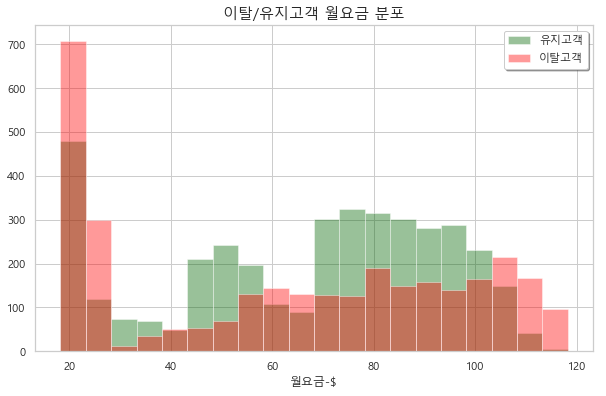

In [43]:
plt.figure(figsize = (10,6))
plt.title('이탈/유지고객 월요금 분포', fontsize = 15)
bins = np.arange(data['MonthlyCharges'].min(),data['MonthlyCharges'].max(), 5 )
sns.distplot(month_contract['MonthlyCharges'], color = 'darkgreen', kde = False, bins = bins)
sns.distplot(long_term_contract['MonthlyCharges'], color = 'red', kde = False, bins = bins)
plt.legend(['유지고객', '이탈고객'], shadow = True)
plt.xlabel('월요금-$')

plt.show()

### [4-2.3] 가설3. 단기 계약자는 장기 계약자보다 월별 요금이 적게 나올 것이다.

- 단기 계약자는 유연한 계약으로 이득을 꾀하는 알뜰한 사람으로 생각된다.
- 그렇다면 단기 계약자의 월요금은 장기 계약자의 월요금보다 적게 나올까?

In [32]:
print('\n[단기계약자월요금중앙값]: ${} \n [장기계약자월요금중앙값]: ${}'.format
      (month_contract['MonthlyCharges'].median(), long_term_contract['MonthlyCharges'].median()))


[단기계약자월요금중앙값]: $73.25 
 [장기계약자월요금중앙값]: $65.6


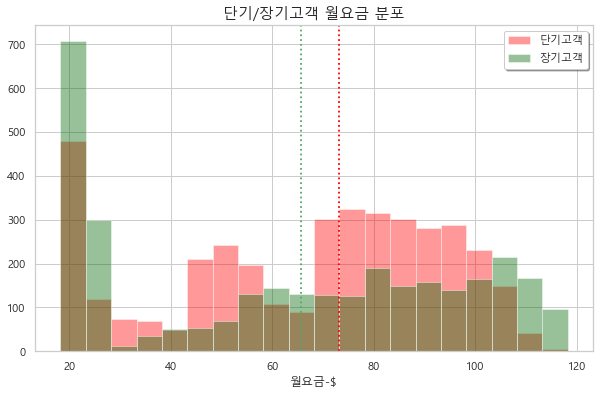

In [44]:
plt.figure(figsize = (10,6))


plt.title('단기/장기고객 월요금 분포', fontsize = 15)
bins = np.arange(min(data['MonthlyCharges']),120,5)
sns.distplot(month_contract['MonthlyCharges'], color = 'red', kde = False, bins = bins)
sns.distplot(long_term_contract['MonthlyCharges'], color = 'darkgreen', kde = False, bins = bins)
plt.legend(['단기고객', '장기고객'], shadow = True)
plt.axvline(month_contract['MonthlyCharges'].median(), color = 'red', linewidth = 1.8 ,linestyle = ':')
plt.axvline(long_term_contract['MonthlyCharges'].median(), color = 'g', linewidth = 1.8 ,linestyle = ':')
plt.xlabel('월요금-$')

plt.show()

### [정보3] 가입기간별 계약방식 

- 당연한 얘기지만 장기간 사용자일수록 년단위 계약을 선호한다.
- 흥미로운 것은 6개월 이전 월단위 계약자의 수가 압도적이라는 것

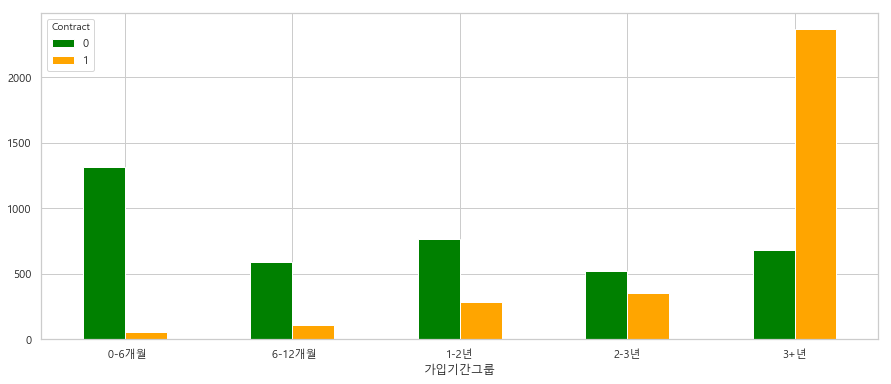

In [39]:
contract_by_tenure = clean_data.groupby(['tenure_group','Contract']).count()['customerID'].reset_index()

contract_by_tenure = contract_by_tenure.pivot('tenure_group','Contract','customerID')
contract_by_tenure.plot(kind = 'bar', rot = False, figsize = (15,6), color = ['green','orange'])
plt.xlabel('가입기간그룹')
plt.show()
# # plt.title('계약기간별 유지/이탈분포', fontsize = 15)
# plt.legend(['유지','이탈'])
# plt.show()

## 4-3. Insurance(보험)

<img src ='https://github.com/h33sun/Lets-EDA/blob/master/Insurance.jpg?raw=true' width = '60%'>


### [4-3.1] 가설4. 보험에 가입한 사람은 그렇지 않은 사람보다 이탈률이 적을 것이다.

- 보험에 가입한 사람은 신중한 사람일 것이다. 그렇다면 통신사를 오래 쓰지 않을까?

#### - 보험개수별 이탈자
- 2개 이상의 보험(max4개)을 가입한 가입자의 이탈률은 급격히 낮아졌다.

In [35]:
idx_1 = (clean_data['Churn'] ==1) * (clean_data['Insurance'] == 0)
idx_2 = (clean_data['Churn'] ==1) * (clean_data['Insurance'] != 0)


print('보험을 아예 들지 않은 용감한 싸나이들은 {}%가 이탈한 반면 보험가입자들은 {}%만 이탈했다.'
     .format(
         round(len(clean_data[idx_1])/len(clean_data[clean_data['Insurance']==0])*100,1),
         round(len(clean_data[idx_2])/len(clean_data[clean_data['Insurance']!=0])*100,1)
     
     ))

보험을 아예 들지 않은 용감한 싸나이들은 56.7%가 이탈한 반면 보험가입자들은 19.9%만 이탈했다.


In [36]:
clean_data.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn,tenure_group
0,7590-VHVEG,1,0,1,0,0,1,0,1,0,29.85,29.85,2,0,1,0,0-6개월
1,5575-GNVDE,0,0,34,1,1,1,1,0,1,56.95,1889.50,1,0,2,0,2-3년
2,3668-QPYBK,0,0,2,1,1,1,0,1,1,53.85,108.15,1,0,2,1,0-6개월
3,7795-CFOCW,0,0,45,0,0,1,1,0,1,42.30,1840.75,1,0,3,0,3+년
4,9237-HQITU,1,0,2,1,1,2,0,1,0,70.70,151.65,1,0,0,1,0-6개월


In [37]:
len(clean_data['Insurance']==0),len(clean_data['Insurance']!=0)

(7043, 7043)

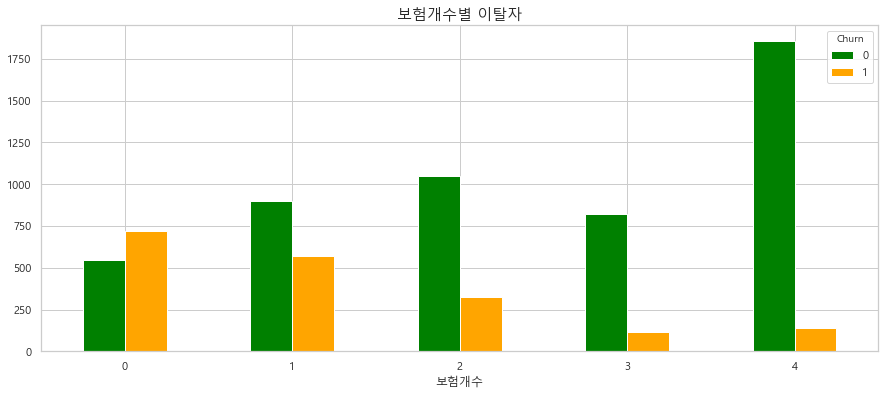

In [38]:

insurance_by_tenure = clean_data.groupby(['Insurance','Churn']).count()['customerID'].reset_index()

insurance_by_tenure = insurance_by_tenure.pivot('Insurance','Churn','customerID')
insurance_by_tenure.plot(kind = 'bar', rot = False, figsize = (15,6), color = ['green','orange'])
plt.title('보험개수별 이탈자',fontsize = 15)
plt.xlabel('보험개수')
plt.show()

<img src='https://github.com/h33sun/Lets-EDA/blob/master/Thankyou.PNG?raw=true' width='400px' height= '80px'>